# Omnibus Embedding for Multiview Data

This demo shows you how to run Omnibus Embedding on multiview data. Omnibus embedding is originally a multigraph algorithm. The purpose of omnibus embedding is to find a Euclidean representation (latent position) of multiple graphs. The embedded latent positions live in the same canonical space allowing us to easily compare the embedded graphs to each other without aligning results. You can read more about both the implementation of Omnibus embedding used and the algorithm itself from the [graspy](https://graspy.neurodata.io/tutorials/embedding/omnibus) package.

Unlike graphs however, multiview data can consist of arbitrary arrays of different dimensions. This represents an additional challenge of comparing the information contained in each view. An effective solution is to first compute the **dissimilarity matrix** for each view. Assuming each view has *n* samples, we will be left with an *n x n* matrix for each view. If the distance function used to compute these matrices is symmetric, the dissimilarity matrices will also be symmetric and we are left with "graph-like" objects. Omnibus embedding can then be applied and the resulting embeddings show whether views give similar or different information.

Below, we show the results of Omnibus embedding on multiview data when the two views are very similar and very different. We then apply Omnibus to two different views in the UCI handwritten digits dataset.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from mvlearn.embed import omnibus

## Case 1: two identical views
For this setting, we generate two identical numpy matrices as our views. Since the information is identical in each view, the resulting embedded views should also be similar. We run omnibus on default parameters.

In [2]:
# 100 x 50 matrices
X_1 = np.random.rand(100, 50)
X_2 = X_1.copy()

Xs = [X_1, X_2]

# Running omnibus
embedder = omnibus.Omnibus()
embeddings = embedder.fit_transform(Xs)

### Visualizing the results

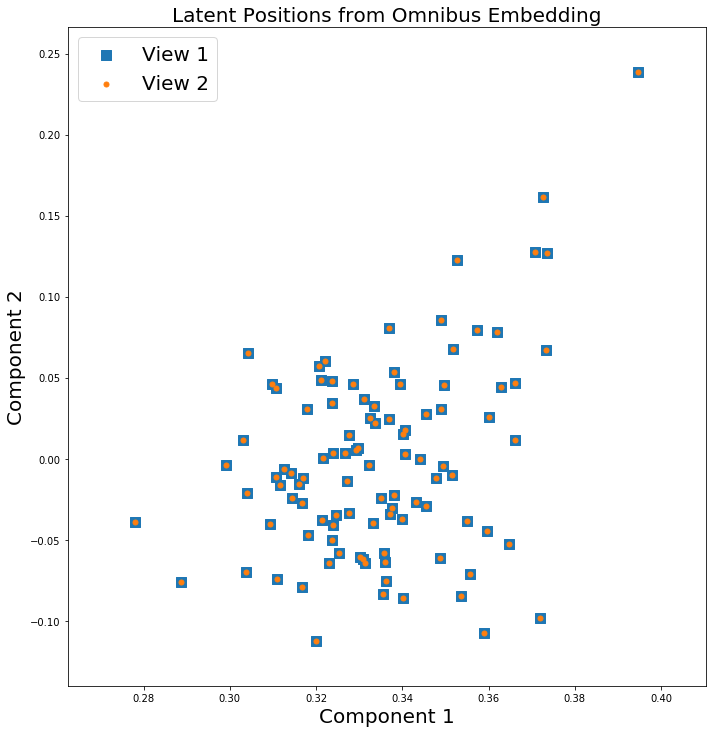

In [3]:
Xhat1, Xhat2 = embeddings

fig, ax = plt.subplots(figsize=(10, 10))
ct = ax.scatter(Xhat1[:, 0], Xhat1[:, 1], marker='s', label = 'View 1', cmap = "tab10", s = 100)
ax.scatter(Xhat2[:, 0], Xhat2[:, 1], marker='.', label= 'View 2', cmap = "tab10", s = 100)
plt.legend(fontsize=20)

# Plot lines between matched pairs of points
for i in range(50):
    idx = np.random.randint(len(Xhat1), size=1)
    ax.plot([Xhat1[idx, 0], Xhat2[idx, 0]], [Xhat1[idx, 1], Xhat2[idx, 1]], 'black', alpha = 0.15)
plt.xlabel("Component 1", fontsize=20)
plt.ylabel("Component 2", fontsize=20)
plt.tight_layout()
ax.set_title('Latent Positions from Omnibus Embedding', fontsize=20)
plt.show()

As expected, the embeddings are identical since the views are the same.

## Case 2: two unidentical views
Now let's see what happens when the views are not identical.

In [4]:
X_1 = np.random.rand(100, 50)
# Second view has different number of features
X_2 = np.random.rand(100, 100)

Xs = [X_1, X_2]

# Running omnibus
embedder = omnibus.Omnibus()
embeddings = embedder.fit_transform(Xs)

### Visualizing the results

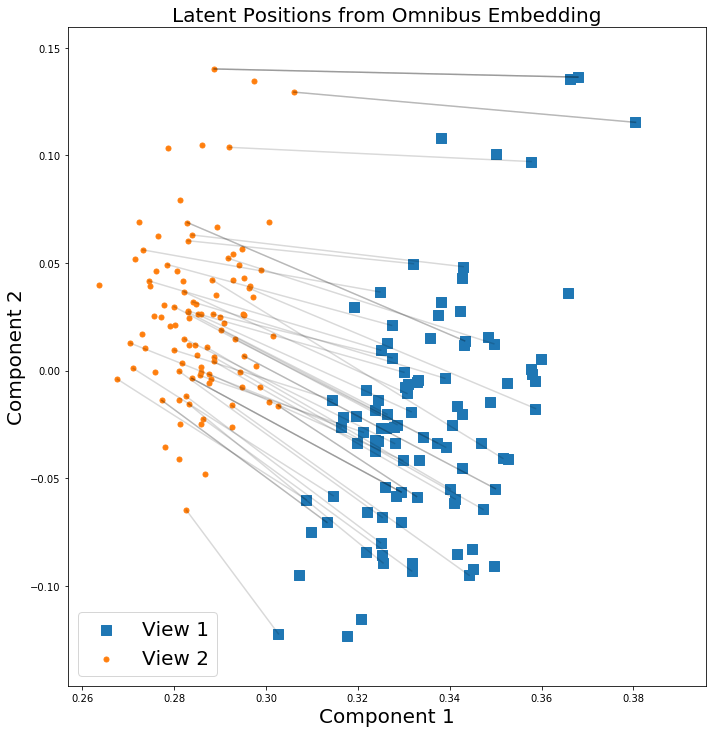

In [5]:
Xhat1, Xhat2 = embeddings

fig, ax = plt.subplots(figsize=(10, 10))
ct = ax.scatter(Xhat1[:, 0], Xhat1[:, 1], marker='s', label = 'View 1', cmap = "tab10", s = 100)
ax.scatter(Xhat2[:, 0], Xhat2[:, 1], marker='.', label= 'View 2', cmap = "tab10", s = 100)
plt.legend(fontsize=20)

# Plot lines between matched pairs of points
for i in range(50):
    idx = np.random.randint(len(Xhat1), size=1)
    ax.plot([Xhat1[idx, 0], Xhat2[idx, 0]], [Xhat1[idx, 1], Xhat2[idx, 1]], 'black', alpha = 0.15)
plt.xlabel("Component 1", fontsize=20)
plt.ylabel("Component 2", fontsize=20)
plt.tight_layout()
ax.set_title('Latent Positions from Omnibus Embedding', fontsize=20)
plt.show()

Here, we see that the views are clearly separated suggeseting the views represent different information. Lines are drawn between corresponding samples in the two views.

## UCI Digits Dataset
Finally, we run Omnibus on the [UCI Multiple Features Digits Dataset](https://archive.ics.uci.edu/ml/datasets/Multiple+Features). We use the Fourier coefficient and profile correlation views (View 1 and 2 respectively).

In [7]:
from mvlearn.datasets.base import load_UCImultifeature

full_data, full_labels = load_UCImultifeature()
view_1 = full_data[0]
view_2 = full_data[1]

Xs = [view_1, view_2]

# Running omnibus
embedder = omnibus.Omnibus()
embeddings = embedder.fit_transform(Xs)

### Visualizing the results
This time, the points in the plot are colored by digit (0-9). The marker symbols denote which view each sample is from. We randomly plot 500 samples to make the plot more readable.

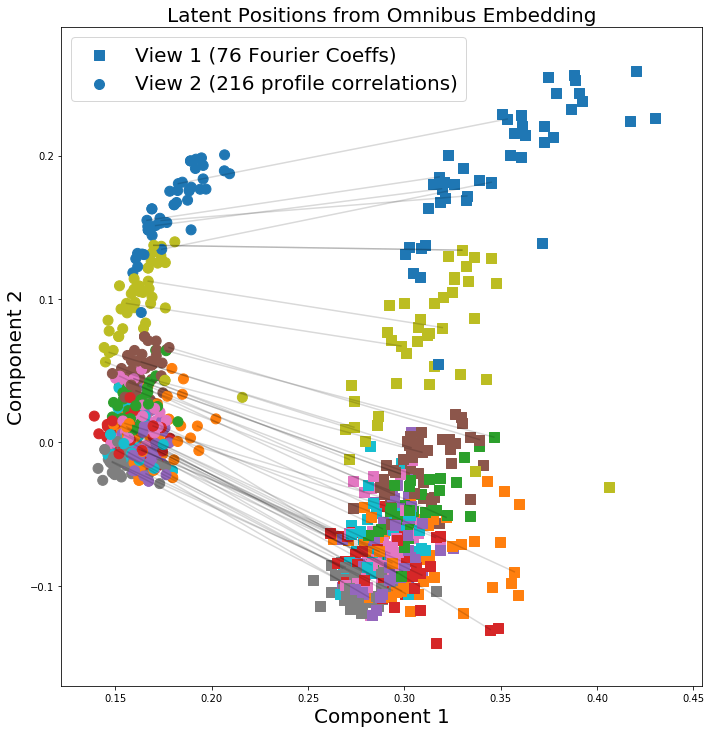

In [8]:
Xhat1, Xhat2 = embeddings

n = 500
idxs = np.random.randint(len(Xhat1), size=n)
Xhat1 = Xhat1[idxs, :]
Xhat2 = Xhat2[idxs, :]
labels = full_labels[idxs]


fig, ax = plt.subplots(figsize=(10, 10))
ct = ax.scatter(Xhat1[:, 0], Xhat1[:, 1], marker='s', label = 'View 1 (76 Fourier Coeffs)', c = labels, cmap = "tab10", s = 100)
ax.scatter(Xhat2[:, 0], Xhat2[:, 1], marker='o', label= 'View 2 (216 profile correlations)', c = labels, cmap = "tab10", s = 100)
plt.legend(fontsize=20)
#fig.colorbar(ct)

# Plot lines between matched pairs of points
for i in range(50):
    idx = np.random.randint(len(Xhat1), size=1)
    ax.plot([Xhat1[idx, 0], Xhat2[idx, 0]], [Xhat1[idx, 1], Xhat2[idx, 1]], 'black', alpha = 0.15)
plt.xlabel("Component 1", fontsize=20)
plt.ylabel("Component 2", fontsize=20)
plt.tight_layout()
ax.set_title('Latent Positions from Omnibus Embedding', fontsize=20)
plt.show()